In [ ]:
pip install transformers

In [1]:
from transformers import pipeline
image_to_text = pipeline("image-to-text",model="nlpconnect/vit-gpt2-image-captioning")

config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [2]:
import os
data_folder_path = '/content/data/image_tag_dataset'

folder_contents = os.listdir(data_folder_path)
print("Contents of the 'data' folder:")
for item in folder_contents:
    print(item)


Contents of the 'data' folder:


In [3]:
!pip install nltk


In [4]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [5]:
import nltk
from nltk.tag import pos_tag
nltk.download('punkt')
from nltk.tokenize import word_tokenize
response_text = "This is love bird sittting on the glass"
tokens = word_tokenize(response_text)
tagged_tokens = pos_tag(tokens)
print(tagged_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('This', 'DT'), ('is', 'VBZ'), ('love', 'JJ'), ('bird', 'NN'), ('sittting', 'VBG'), ('on', 'IN'), ('the', 'DT'), ('glass', 'NN')]


/content/drive/MyDrive/Image_tagging/data/6.jpg
a man wearing a hat and a red hat 
/content/drive/MyDrive/Image_tagging/data/7.jpg
a stuffed animal with a red bow on it 
/content/drive/MyDrive/Image_tagging/data/8.jpg
a christmas tree with a christmas tree 
/content/drive/MyDrive/Image_tagging/data/5.jpg
a sunset on a beach with a body of water 
/content/drive/MyDrive/Image_tagging/data/1.jpg
a close up of a close up of a camera 
/content/drive/MyDrive/Image_tagging/data/4.jpg
a laptop computer sitting on top of a wooden table 
/content/drive/MyDrive/Image_tagging/data/3.jpg
a red and white bottle of beer sitting on a table 
/content/drive/MyDrive/Image_tagging/data/2.jpg
a red and white bottle of beer sitting on a table 


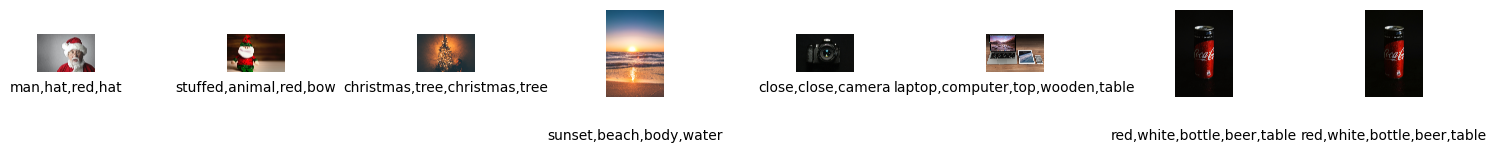

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag


data_folder_path = '/content/drive/MyDrive/Image_tagging/data'
folder_contents = os.listdir(data_folder_path)
num_imgaes = len(folder_contents)
fig,axes = plt.subplots(1,num_imgaes,figsize=(15,5))

for i, image_file in enumerate(folder_contents):
  image_path =  os.path.join(data_folder_path,image_file)
  print(image_path)
  img = mpimg.imread(image_path)
  axes[i].imshow(img)
  response = image_to_text(image_path)[0]
  response_text = response['generated_text']
  print(response_text)
  tokens = word_tokenize(response_text)
  tagged_tokens = pos_tag(tokens)
  keywords = [word for word,pos in tagged_tokens if pos in ['NN','NNS','JJ']]
  keyword_string = ','.join(keywords)
  axes[i].axis('off')
  axes[i].text(0.5, -0.5, keyword_string, fontsize=10, ha='center', transform=axes[i].transAxes)

plt.tight_layout(pad=3.0)

# New Section